2# EQUIPMENT FAILURE FOR MAINTENACE
  **ON SENSOR DATA**

## Abstract

Predictive maintenance plays a crucial role in various
industries to ensure the reliability and efficiency of
equipment. This paper presents a comprehensive
methodology for predictive maintenance, leveraging
advanced machine learning (ML) and deep learning
techniques. The objective is to develop a predictive
maintenance system capable of preemptively
identifying equipment failures, thereby enabling
proactive maintenance interventions. The methodology
encompasses data collection, preprocessing, feature
engineering, model selection, training, and
deployment. Various tools and technologies such as
Python programming language, TensorFlow, and cloud
computing platforms are employed to enhance
scalability and flexibility. The proposed framework is
applicable across diverse domains, offering significant
impacts such as reduced downtime, lower maintenance
costs, and improved operational efficiency.

## Why we choosen this project ?

Predictive Maintenance (PdM) is an ML-based strategy that uses data to predict when an equipment failure might occur.
This helps in identifying the potential issues with the equipment and what parts need to be fixed and when.

Sensor data has become particularly important in PdM. This data is collected from smart sensors on manufacturing equipment, providing real-time information on device status.

Sensor data can be sourced from various internal and external repositories, covering entire factories, transportation fleets, or infrastructure networks. This data is distributed via IoT sensor technology, highlighting the growing recognition of data's value in maintenance processes.

In conclusion, PdM leverages ML and sensor data to optimize maintenance processes, resulting in cost savings, improved safety, and enhanced operational efficiency.

Predictive Maintenance: Examples and Use Cases
- **Infrared Imagery (IR cameras)**: Hot spots of electric wiring
- **Acoustic Analysis**: Detecting gas and vacuum leaks
- **Vibration Analysis**: Determining the fluctuations of the vibration of essential components
- **Oil Analysis**: Checking the condition of a machine’s oil lubrication system

## Sensor Data Sources

We've explored various platforms for sensor data, including:

1. **Hugging Face**
2. **UC Irvine Machine Learning Repository**
3. **Google Datasets**
4. **Kaggle Predictive Maintenance**
5. **Kaggle Bosch Production Line Performance**
6. **Prognostics Data Repository**

After thorough research, We found the same sensor data on two platforms: **Hugging Face** and **UC Irvine Machine Learning Repository**.

**Data Source link**:
1. https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset
2. https://huggingface.co/spaces/AsusHP/machine_failure_predict

## Sensor Data Details

The sensor data you found contains the following parameters:

- Column contains

1. **UDI**: Serial no.
2. **Product ID** - Equipment ID
3. **Type**: Consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
4. **Air Temperature**: in K
5. **Process Temperature**: in K
6. **Rotational Speed**: Revolutions per minute
7. **Torque**: in Newton meter
8. **tool wear**: minutes
9. **Machine Failure**: 0 or 1
10. **TWF** : Tool Wear Failure
11. **HDF** : Heat Dissipation Failure
12. **PWF** : Power Failure
13. **OSF** : Overstrain Failure
14. **RNF** : random Failures

This data can be crucial for predictive maintenance, performance analysis, and failure prevention in machinery.😊

## Importing the Important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Loading Sensor Data

In [2]:
# Specify the path to your file
file_path = 'https://drive.google.com/uc?export=download&id=1HX0XfoDs59snFwFpkBspe0NNNap856Qg'

# Use pandas to read the file
df = pd.read_csv(file_path)

## Analysing First Five Rows

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


- Column contains

1. **UDI**: Serial no.
2. **Product ID** - Equipment ID
3. **Type**: Consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
4. **Air Temperature**: in K
5. **Process Temperature**: in K
6. **Rotational Speed**: Revolutions per minute
7. **Torque**: in Newton meter
8. **tool wear**: minutes
9. **Machine Failure**: 0 or 1
10. **TWF** : Tool Wear Failure
11. **HDF** : Heat Dissipation Failure
12. **PWF** : Power Failure
13. **OSF** : Overstrain Failure
14. **RNF** : random Failures

## Checking Shape of Dataset

In [5]:
numberofrows_1, numberofcolumns_1 = df.shape
print('There are {} rows and {} columns'.format(numberofrows_1, numberofcolumns_1)+' in SensorData.')

There are 10000 rows and 14 columns in SensorData.


## Checking DataType

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## Statistic Summary of Dataset

In [7]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Here’s a brief overview of the DataFrame:

- Count: All columns have a count of 10,000, indicating there are no missing values.
- Mean: This row represents the average value for each column.
- Std: This row shows the standard deviation, which measures the amount of variation in each column.
- Min: This row shows the minimum value in each column.
- 25%: This is the first quartile, indicating that 25% of the data in each column is below this value.
- 50%: This is the median, indicating that 50% of the data in each column is below this value.
- 75%: This is the third quartile, indicating that 75% of the data in each column is below this value.
- Max: This row shows the maximum value in each column.

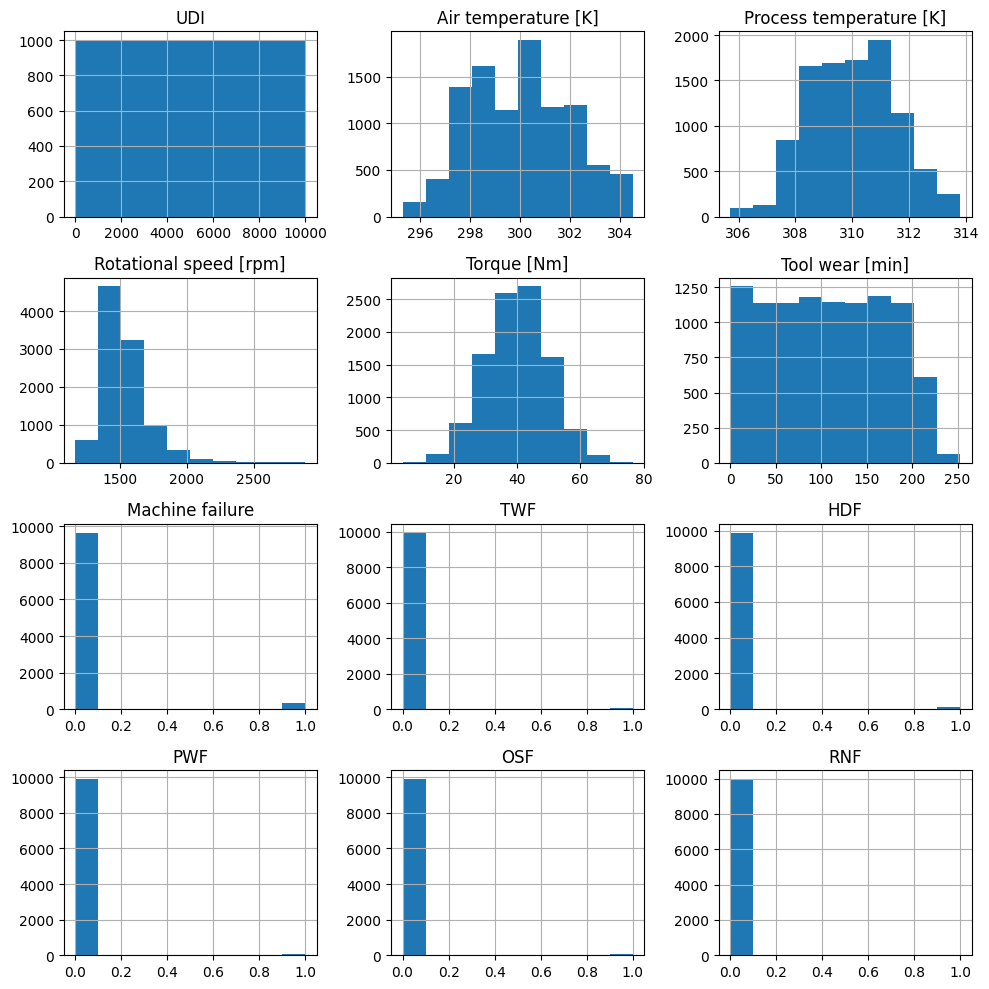

In [8]:
# Visualize the data
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

- Here's the brife observation of above :

In all graph, it shows the distribution of the data in each column.

## Checking Null Values

In [9]:
df.isnull()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

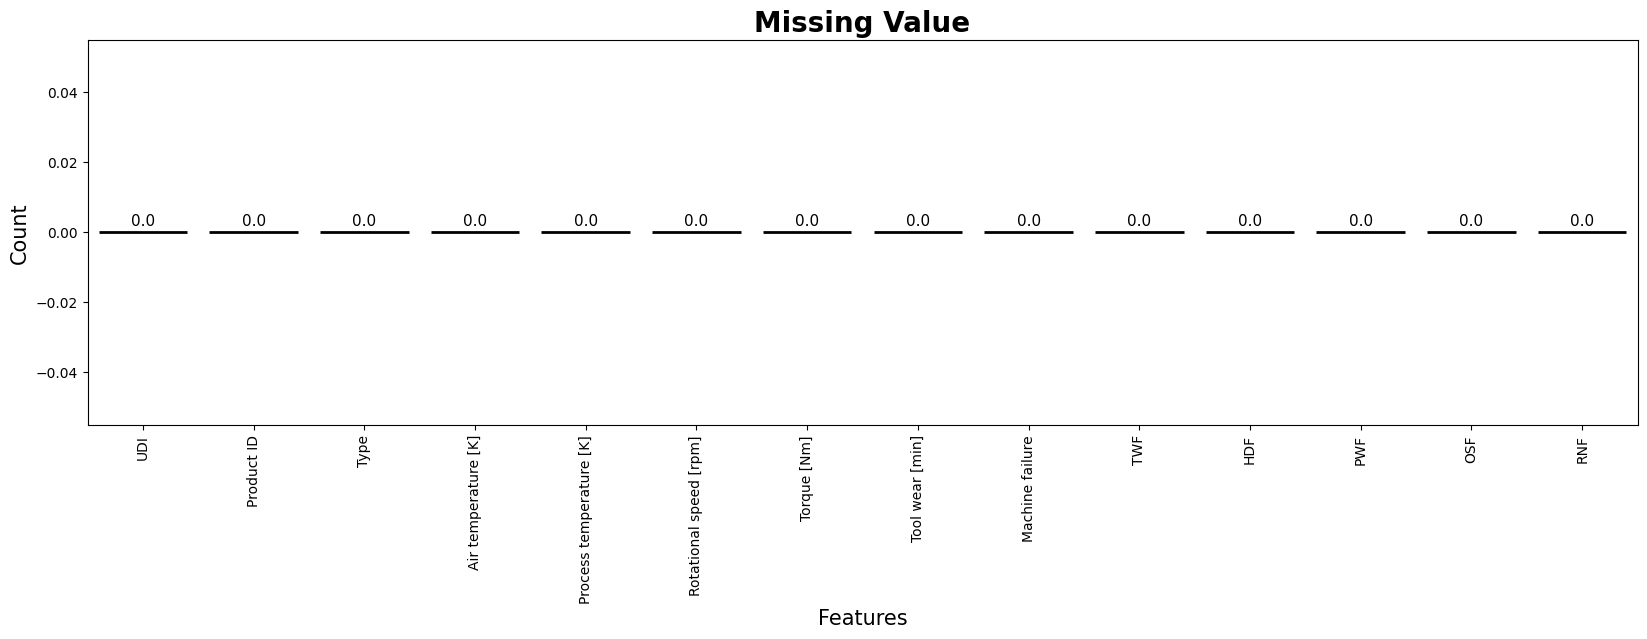

In [11]:
Value_Missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (20, 5))
plt.xticks(rotation = 90)
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0,3), textcoords = 'offset points')
cplot.set_title('Missing Value', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

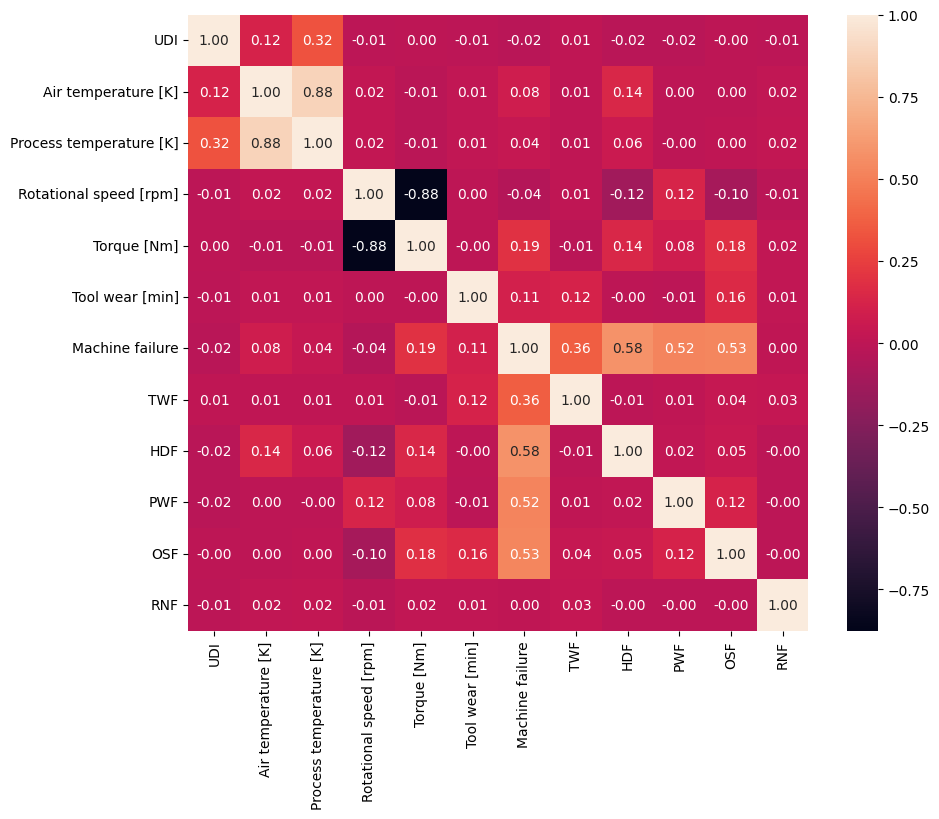

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10,8))
# Plot a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, fmt=".2f")
# Display the plot
plt.show()


<Axes: xlabel='Type', ylabel='count'>

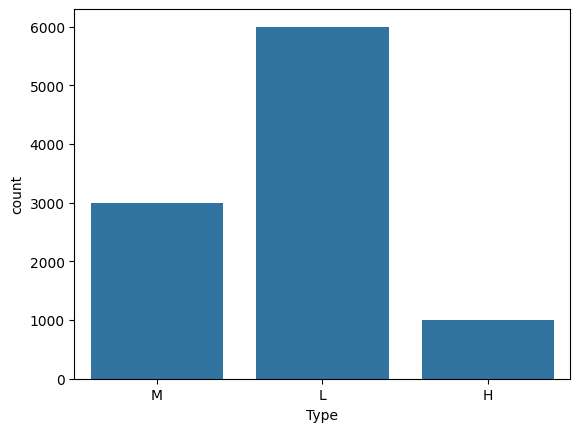

In [13]:
sns.countplot(x="Type", data=df)

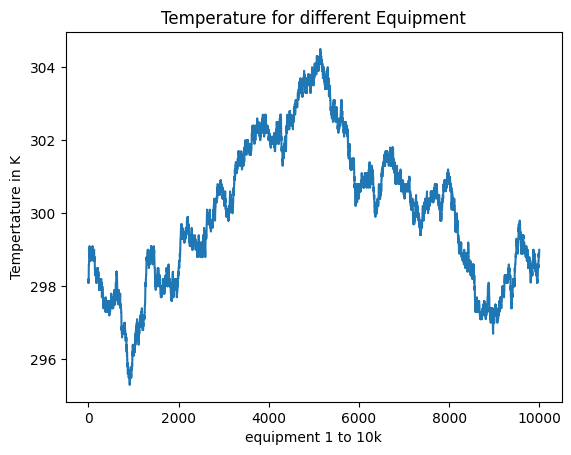

In [14]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to plot
plt.plot(df['Air temperature [K]'])

plt.title('Temperature for different Equipment')
plt.xlabel('equipment 1 to 10k')
plt.ylabel('Tempertature in K')

plt.show()


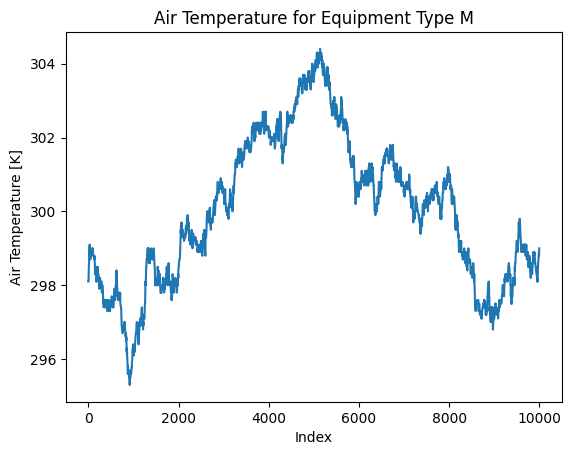

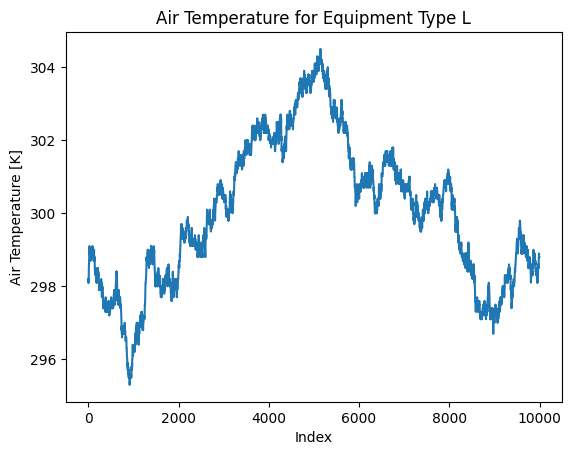

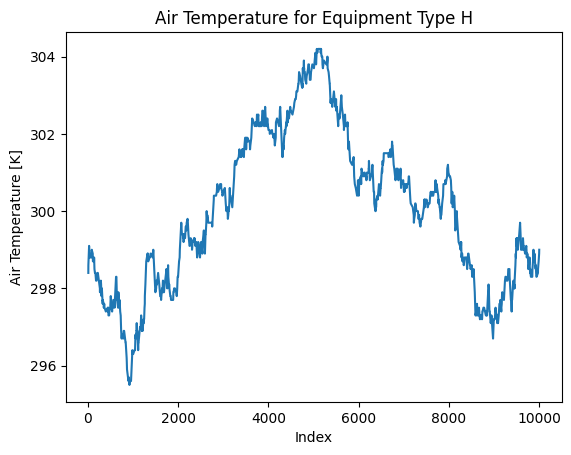

In [15]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Type' and 'Air temperature [K]' are the columns you want to plot

types = df['Type'].unique()

for equipment_type in types:
    subset = df[df['Type'] == equipment_type]
    plt.figure()  # create a new figure for each type
    plt.plot(subset['Air temperature [K]'])
    plt.title(f'Air Temperature for Equipment Type {equipment_type}')
    plt.xlabel('Index')
    plt.ylabel('Air Temperature [K]')
    plt.show()


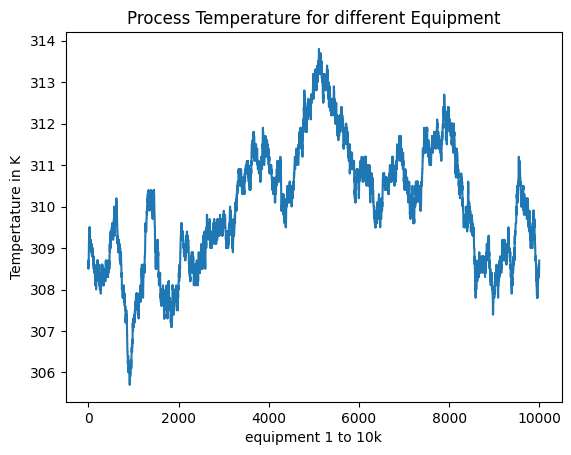

In [16]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to plot
plt.plot(df['Process temperature [K]'])

plt.title('Process Temperature for different Equipment')
plt.xlabel('equipment 1 to 10k')
plt.ylabel('Tempertature in K')

plt.show()


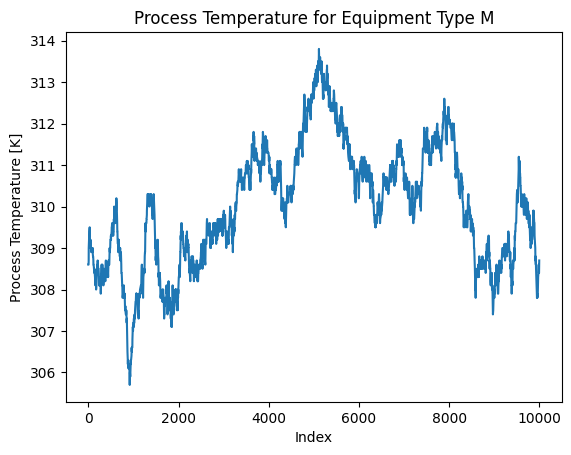

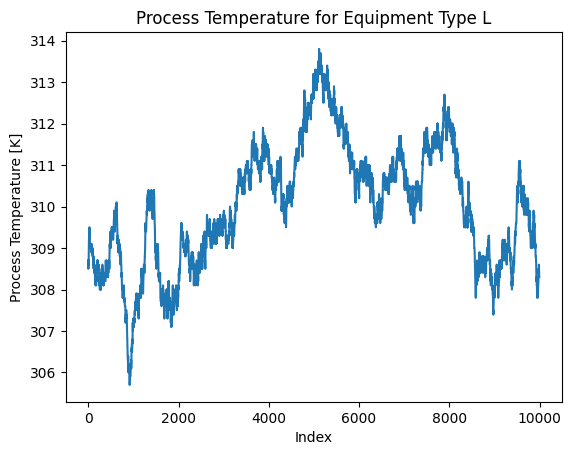

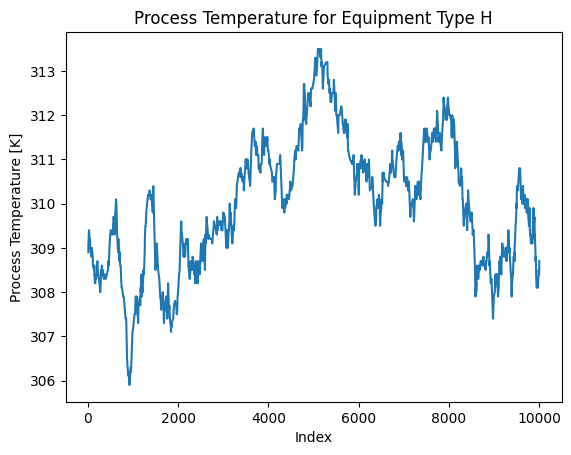

In [17]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Type' and 'Air temperature [K]' are the columns you want to plot

types = df['Type'].unique()

for equipment_type in types:
    subset = df[df['Type'] == equipment_type]
    plt.figure()  # create a new figure for each type
    plt.plot(subset['Process temperature [K]'])
    plt.title(f'Process Temperature for Equipment Type {equipment_type}')
    plt.xlabel('Index')
    plt.ylabel('Process Temperature [K]')
    plt.show()

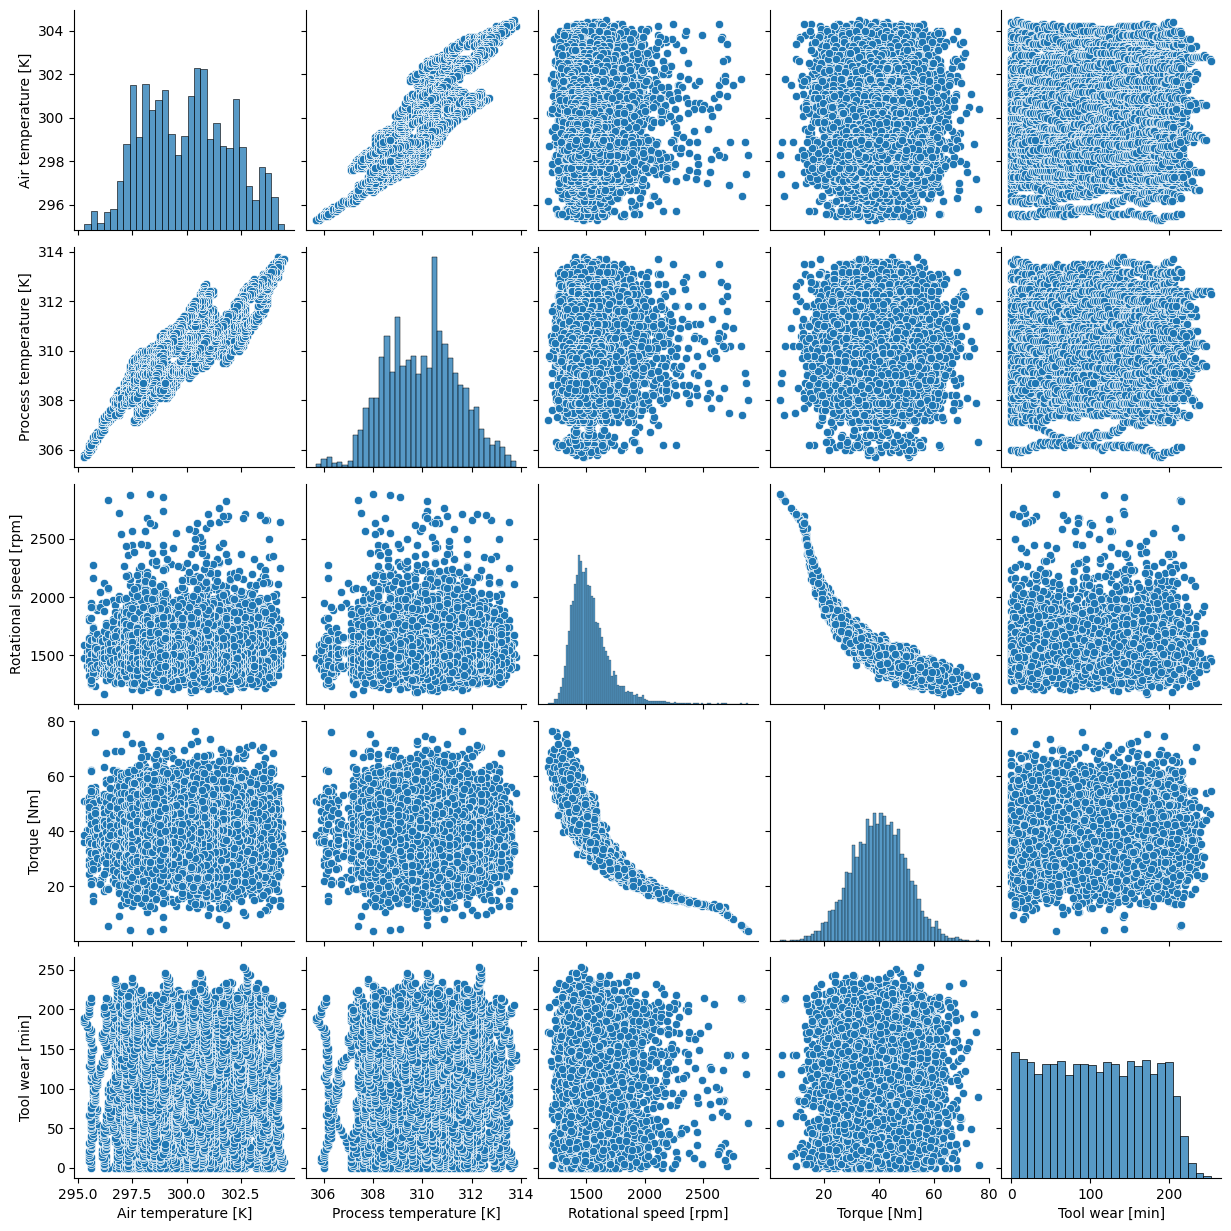

In [18]:
# Pairplot for selected features
selected_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
sns.pairplot(df[selected_features])
plt.show()

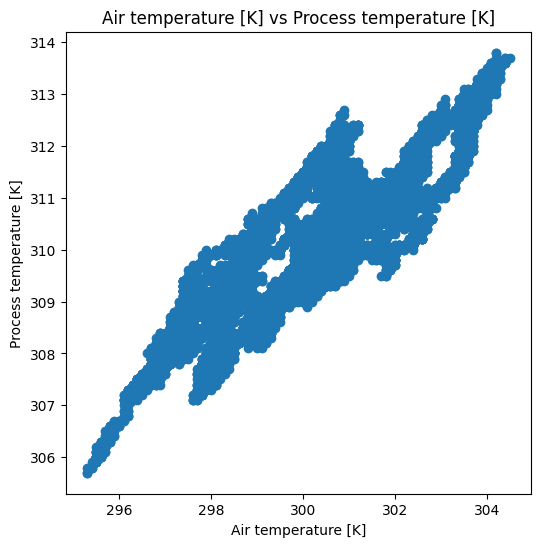

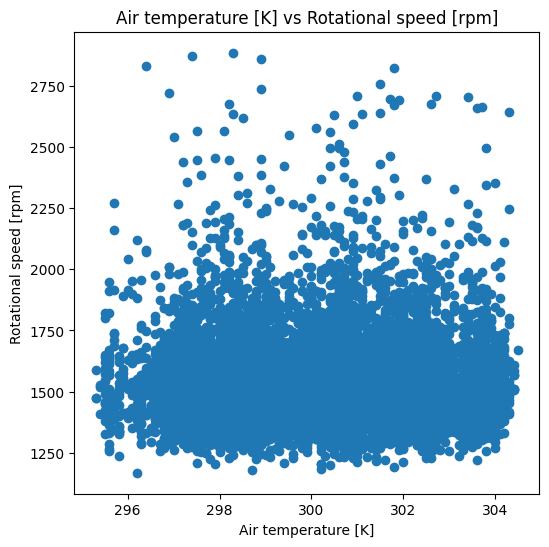

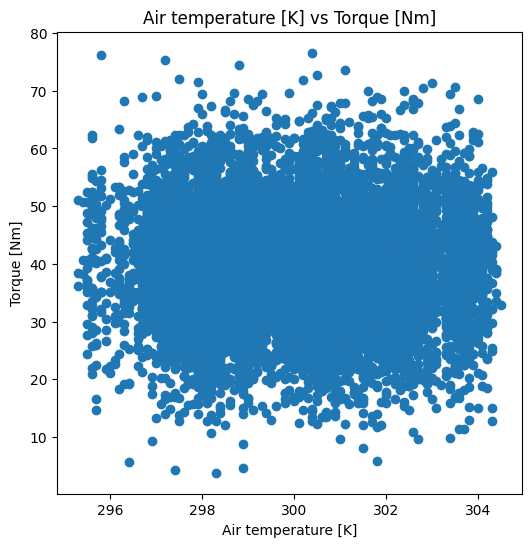

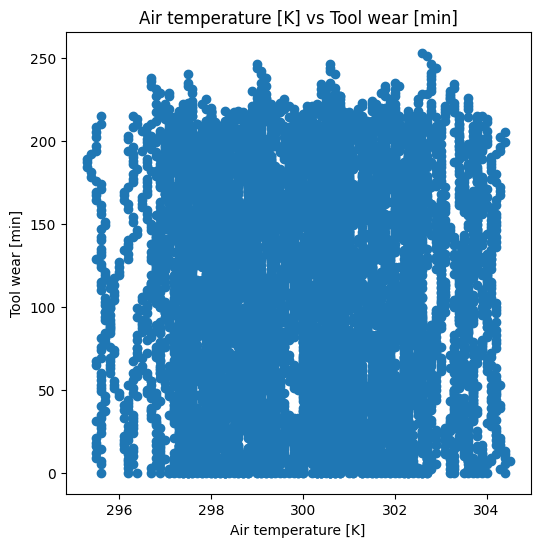

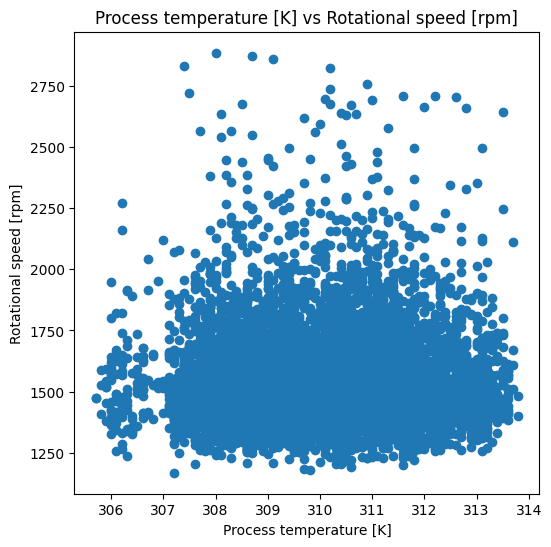

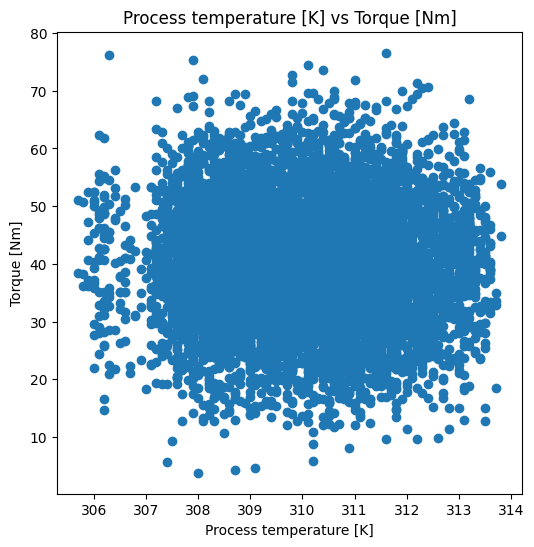

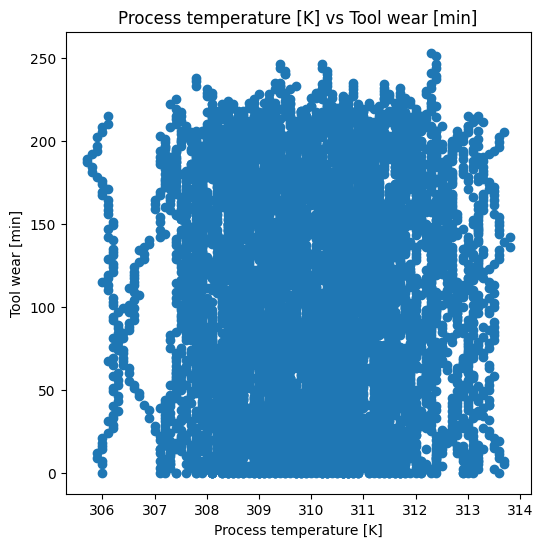

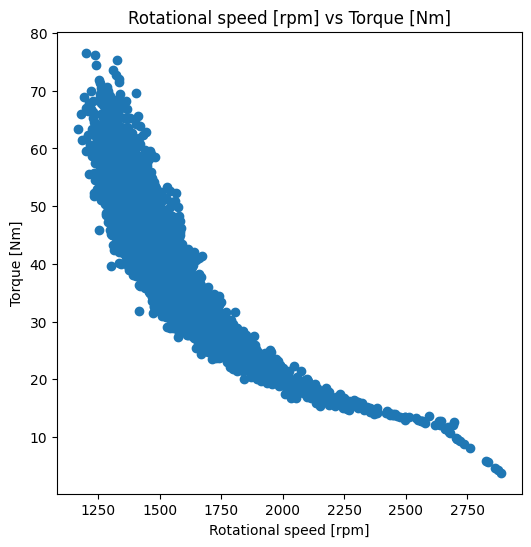

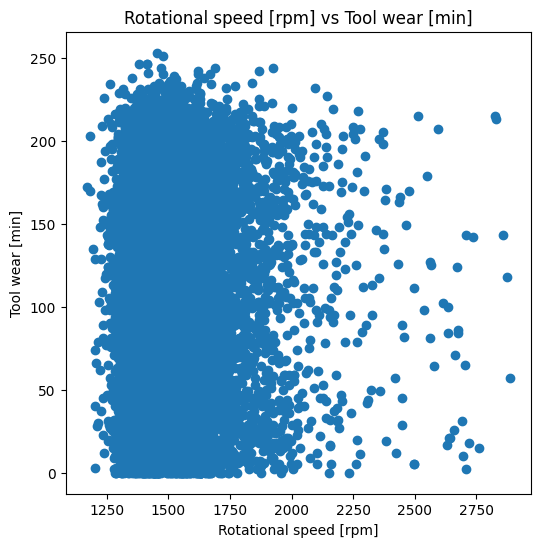

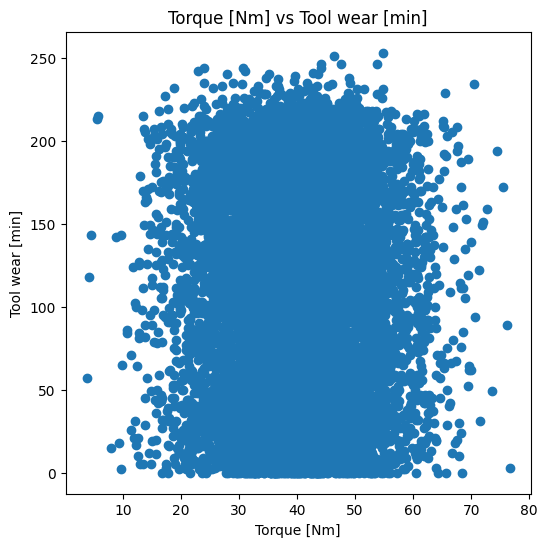

In [19]:
# Scatter plot for each pair of features
for i in range(len(selected_features)):
    for j in range(i+1, len(selected_features)):
        plt.figure(figsize=(6, 6))
        plt.scatter(df[selected_features[i]], df[selected_features[j]])
        plt.xlabel(selected_features[i])
        plt.ylabel(selected_features[j])
        plt.title(f'{selected_features[i]} vs {selected_features[j]}')
        plt.show()

## Data Transformation

In [20]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


- Here we find that in **Air temperature** and **Process temperature** columns temperature are in float so we convert it into int format

In [21]:
import pandas as pd

# Assuming df is your DataFrame and 'Type' is your column
df = pd.get_dummies(df, columns=['Type'])

# Now, df has three new columns 'Type_L', 'Type_M', and 'Type_H' with binary values.
print(df.head())

   UDI Product ID  Air temperature [K]  Process temperature [K]  \
0    1     M14860                298.1                    308.6   
1    2     L47181                298.2                    308.7   
2    3     L47182                298.1                    308.5   
3    4     L47183                298.2                    308.6   
4    5     L47184                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  Type_H  Type_L  Type_M  
0    0    0    0    0       0       0       1  
1    0    0   

In [22]:
df.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


In [23]:
# Assuming df is DataFrame and 'UDI' is the column you want to drop
df = df.drop(columns=['UDI'])

# Now, df doesn't have the 'column_to_drop'.


In [24]:
df.head()

,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


- Assuming df is DataFrame and **'Air temperature [K] & Process temperature [K]'** is the column you want to convert

In [25]:
df['Air temperature [K]'] = df['Air temperature [K]'].astype(int)

df['Process temperature [K]'] = df['Process temperature [K]'].astype(int)

df['Torque [Nm]'] = df['Torque [Nm]'].astype(int)

# Now, 'float_column' has been converted to an integer column.

In [26]:
df.head()

,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,M14860,298,308,1551,42,0,0,0,0,0,0,0,0,0,1
1,L47181,298,308,1408,46,3,0,0,0,0,0,0,0,1,0
2,L47182,298,308,1498,49,5,0,0,0,0,0,0,0,1,0
3,L47183,298,308,1433,39,7,0,0,0,0,0,0,0,1,0
4,L47184,298,308,1408,40,9,0,0,0,0,0,0,0,1,0


## Checking Unique Value in Product ID Column

In [27]:
import pandas as pd
# Assuming 'df' is your DataFrame and 'column_name' is the column for which you want to find unique values
unique_values_with_counts = df['Product ID'].value_counts()
print(unique_values_with_counts)

M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: Product ID, Length: 10000, dtype: int64


In [28]:
import pandas as pd

# Assuming 'df' is your DataFrame
machine_failures = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Types = ['Type_H', 'Type_L', 'Type_M']

# Count the number of machine failures
machine_failures_count = df[machine_failures].sum()

# Count the occurrences of each type
Types_count = df[Types].sum()

# Create a DataFrame for machine failures count
machine_failures_df = pd.DataFrame(machine_failures_count, columns=['Count'])
print("Total Machine Failures Count:")

# Create a DataFrame for types count
print('MF')
Machine_Failure_df = pd.DataFrame(machine_failures_count, columns=['Count'])

print(Machine_Failure_df)


Total Machine Failures Count:
MF
     Count
TWF     46
HDF    115
PWF     95
OSF     98
RNF     19


In [29]:
import pandas as pd

# Assuming 'df' is your DataFrame and it has been created from your data source
machine_failures = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
types = ['Type_H', 'Type_L', 'Type_M']

# Initialize a dictionary to store the results
results = {}

# For each type, count the number of machine failures
for t in types:
    df_type = df[df[t] == 1]
    results[t] = df_type[machine_failures].sum()

# Convert the results to a DataFrame
df_results = pd.DataFrame(results)

# Transpose the DataFrame so that types are rows and machine failures are columns
df_results = df_results.T

# Calculate the percentage for each type of machine failure
df_results_percentage = df_results.div(df_results.sum(axis=1), axis=0) * 100

print("Counts of each type of machine failure:")
print(df_results)
print("\nPercentage of each type of machine failure:")
print(df_results_percentage)


Counts of each type of machine failure:
        TWF  HDF  PWF  OSF  RNF
Type_H    7    8    5    2    4
Type_L   25   76   59   87   13
Type_M   14   31   31    9    2

Percentage of each type of machine failure:
              TWF        HDF        PWF        OSF        RNF
Type_H  26.923077  30.769231  19.230769   7.692308  15.384615
Type_L   9.615385  29.230769  22.692308  33.461538   5.000000
Type_M  16.091954  35.632184  35.632184  10.344828   2.298851


For Type_H:
 - TWF  296min to 302,min.
 - HDF  302min to 303,min.
 - PWF  296min to 304,min.
 - OSF  300min to 302,min.
 - RNF  298min to 302,min.


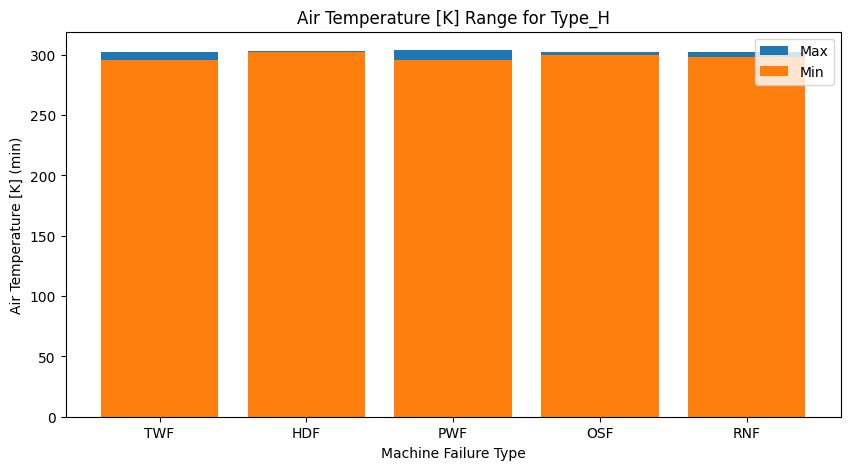

For Type_L:
 - TWF  297min to 304,min.
 - HDF  301min to 303,min.
 - PWF  295min to 303,min.
 - OSF  295min to 304,min.
 - RNF  298min to 302,min.


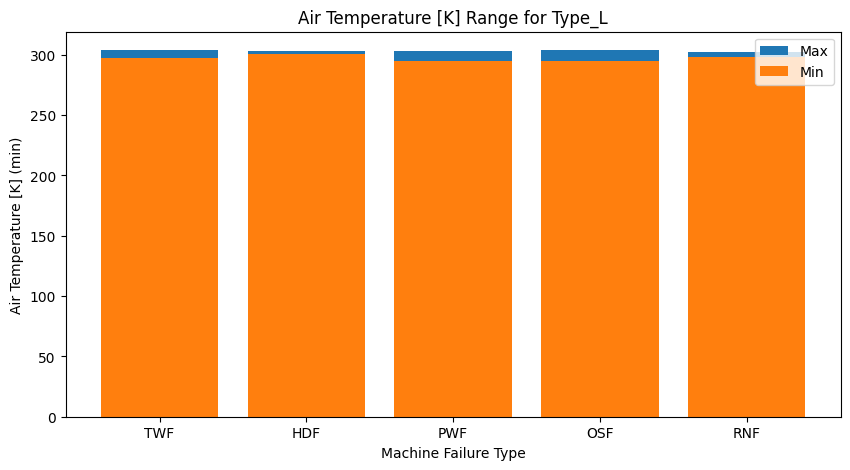

For Type_M:
 - TWF  297min to 303,min.
 - HDF  300min to 303,min.
 - PWF  295min to 303,min.
 - OSF  297min to 302,min.
 - RNF  297min to 300,min.


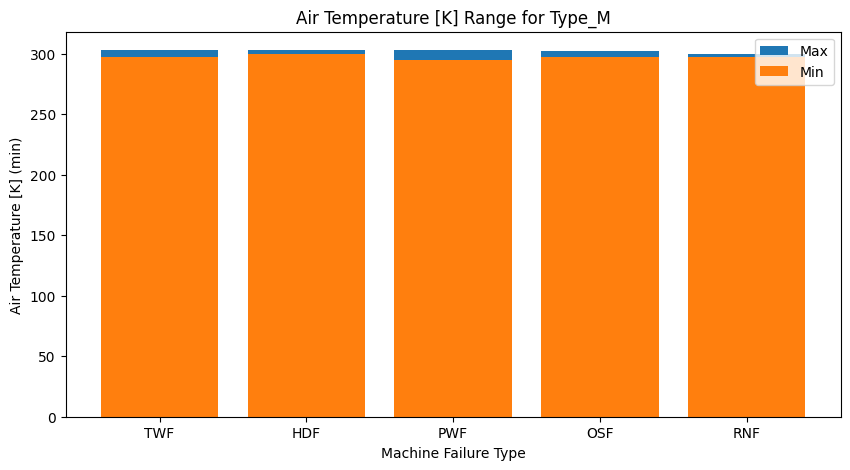

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been created from your data source
machine_failures = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
types = ['Type_H', 'Type_L', 'Type_M']

# For each type, find the range of Air Temperature [K] at which each machine component is failing
for t in types:
    print(f"For {t}:")
    df_type = df[df[t] == 1]

    min_values = []
    max_values = []

    for failure in machine_failures:
        df_failure = df_type[df_type[failure] == 1]
        min_min = df_failure['Air temperature [K]'].min()
        max_min = df_failure['Air temperature [K]'].max()
        print(f" - {failure}  {min_min}min to {max_min},min.")

        min_values.append(min_min)
        max_values.append(max_min)

    # Plotting the range of tool wear time for each machine failure type
    plt.figure(figsize=(10,5))
    plt.bar(machine_failures, max_values, label='Max')
    plt.bar(machine_failures, min_values, label='Min')
    plt.xlabel('Machine Failure Type')
    plt.ylabel('Air Temperature [K] (min)')
    plt.title(f'Air Temperature [K] Range for {t}')
    plt.legend()
    plt.show()


For Type_H:
 - TWF  307min to 311,min.
 - HDF  309min to 312,min.
 - PWF  307min to 313,min.
 - OSF  310min to 312,min.
 - RNF  307min to 312,min.


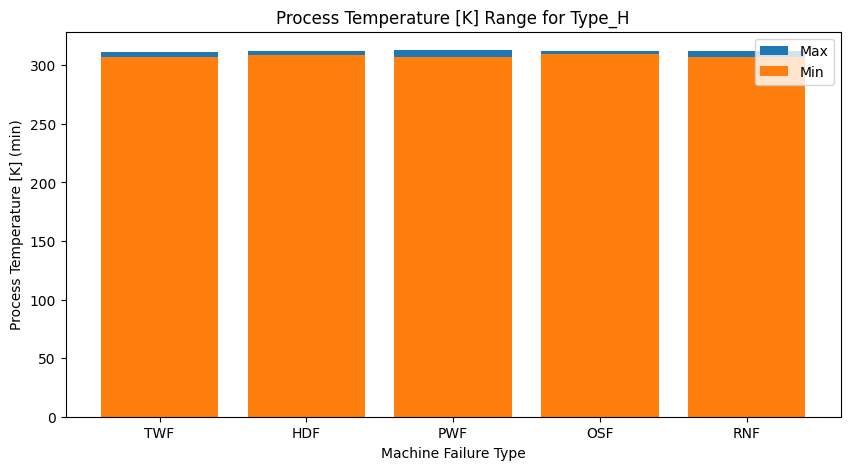

For Type_L:
 - TWF  307min to 313,min.
 - HDF  309min to 312,min.
 - PWF  306min to 313,min.
 - OSF  306min to 313,min.
 - RNF  309min to 312,min.


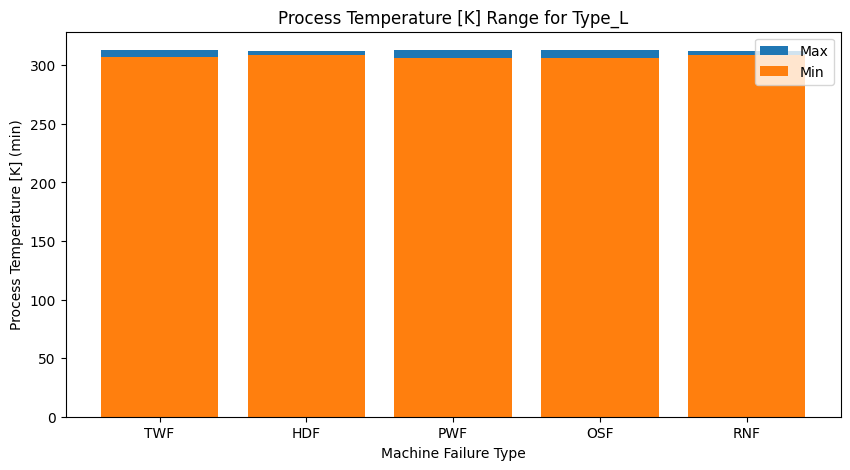

For Type_M:
 - TWF  308min to 313,min.
 - HDF  309min to 311,min.
 - PWF  306min to 312,min.
 - OSF  308min to 312,min.
 - RNF  308min to 309,min.


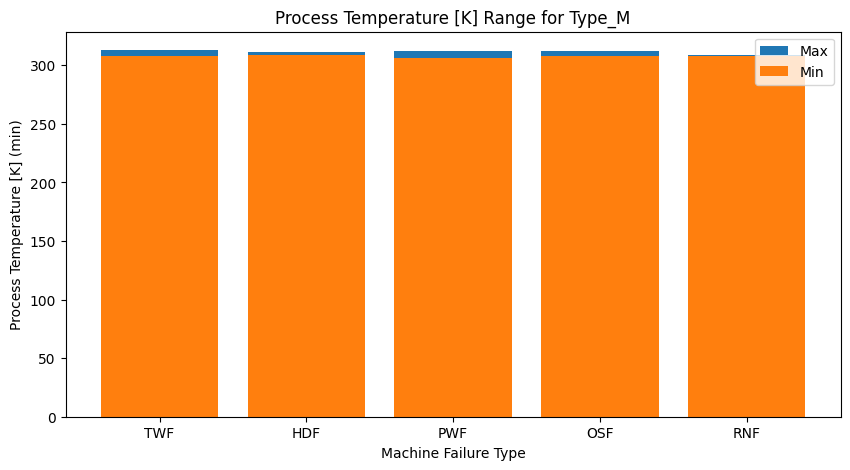

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been created from your data source
machine_failures = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
types = ['Type_H', 'Type_L', 'Type_M']

# For each type, find the range of Process Temperature [K] at which each machine component is failing
for t in types:
    print(f"For {t}:")
    df_type = df[df[t] == 1]

    min_values = []
    max_values = []

    for failure in machine_failures:
        df_failure = df_type[df_type[failure] == 1]
        min_min = df_failure['Process temperature [K]'].min()
        max_min = df_failure['Process temperature [K]'].max()
        print(f" - {failure}  {min_min}min to {max_min},min.")

        min_values.append(min_min)
        max_values.append(max_min)

    # Plotting the range of tool wear time for each machine failure type
    plt.figure(figsize=(10,5))
    plt.bar(machine_failures, max_values, label='Max')
    plt.bar(machine_failures, min_values, label='Min')
    plt.xlabel('Machine Failure Type')
    plt.ylabel('Process Temperature [K] (min)')
    plt.title(f'Process Temperature [K] Range for {t}')
    plt.legend()
    plt.show()


For Type_H:
 - TWF  1364min to 1629,min.
 - HDF  1275min to 1371,min.
 - PWF  1271min to 2563,min.
 - OSF  1364min to 1411,min.
 - RNF  1357min to 1626,min.


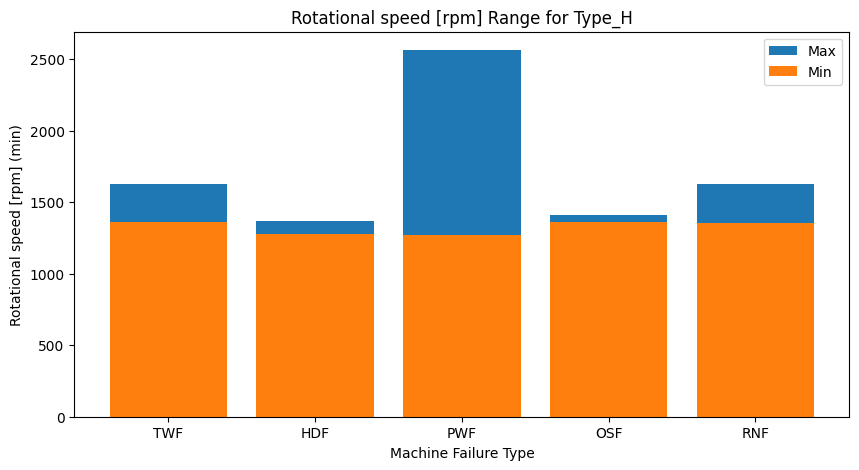

For Type_L:
 - TWF  1323min to 2271,min.
 - HDF  1222min to 1379,min.
 - PWF  1200min to 2886,min.
 - OSF  1181min to 1515,min.
 - RNF  1306min to 1668,min.


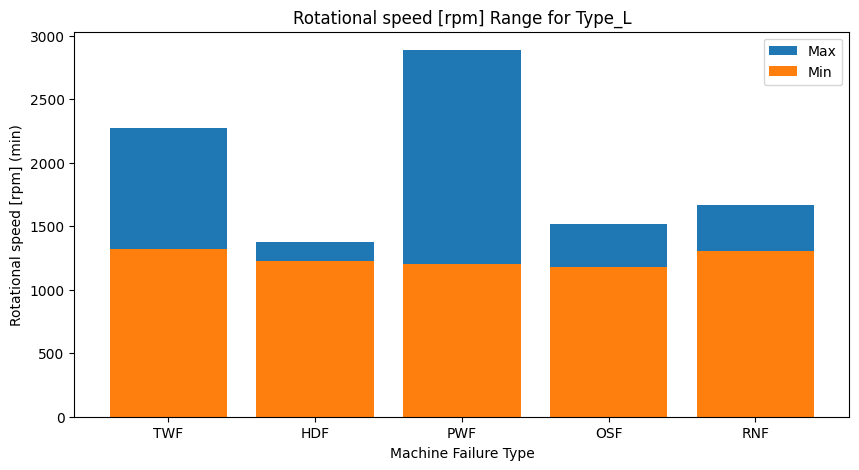

For Type_M:
 - TWF  1325min to 2097,min.
 - HDF  1212min to 1379,min.
 - PWF  1235min to 2710,min.
 - OSF  1227min to 1459,min.
 - RNF  1399min to 1687,min.


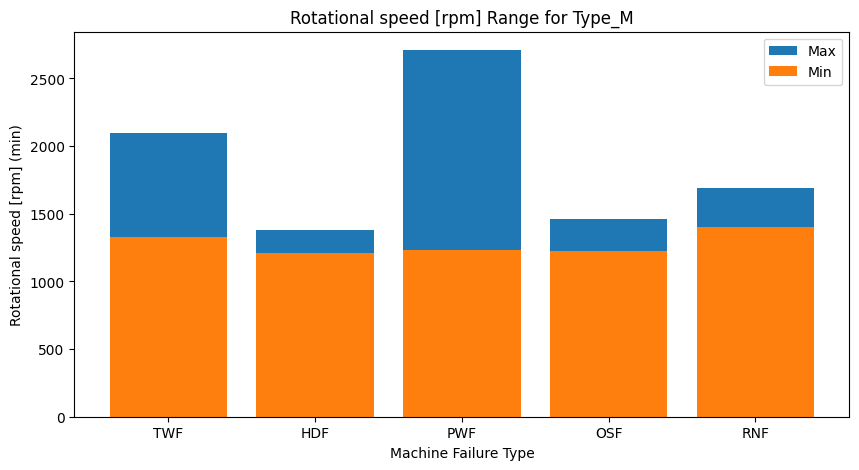

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been created from your data source
machine_failures = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
types = ['Type_H', 'Type_L', 'Type_M']

# For each type, find the range of Rotational speed [rpm] at which each machine component is failing
for t in types:
    print(f"For {t}:")
    df_type = df[df[t] == 1]

    min_values = []
    max_values = []

    for failure in machine_failures:
        df_failure = df_type[df_type[failure] == 1]
        min_min = df_failure['Rotational speed [rpm]'].min()
        max_min = df_failure['Rotational speed [rpm]'].max()
        print(f" - {failure}  {min_min}min to {max_min},min.")

        min_values.append(min_min)
        max_values.append(max_min)

    # Plotting the range of tool wear time for each machine failure type
    plt.figure(figsize=(10,5))
    plt.bar(machine_failures, max_values, label='Max')
    plt.bar(machine_failures, min_values, label='Min')
    plt.xlabel('Machine Failure Type')
    plt.ylabel('Rotational speed [rpm] (min)')
    plt.title(f'Rotational speed [rpm] Range for {t}')
    plt.legend()
    plt.show()


For Type_H:
 - TWF  34min to 65,min.
 - HDF  48min to 62,min.
 - PWF  12min to 72,min.
 - OSF  53min to 65,min.
 - RNF  31min to 55,min.


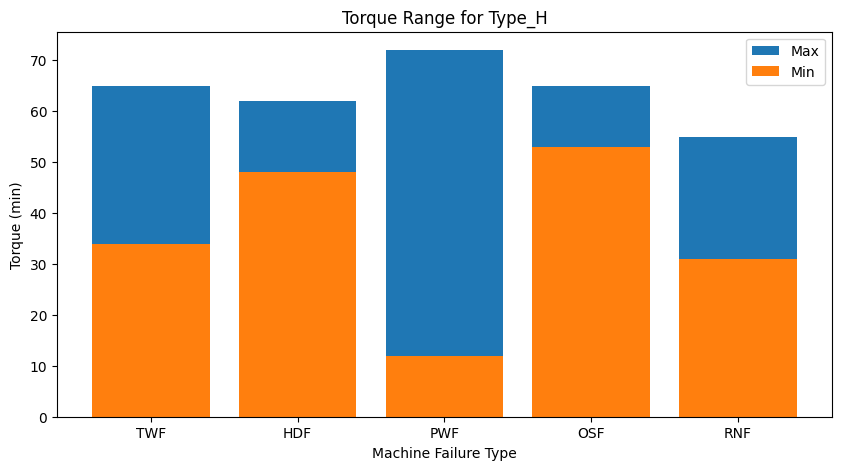

For Type_L:
 - TWF  16min to 46,min.
 - HDF  41min to 68,min.
 - PWF  3min to 76,min.
 - OSF  46min to 75,min.
 - RNF  28min to 61,min.


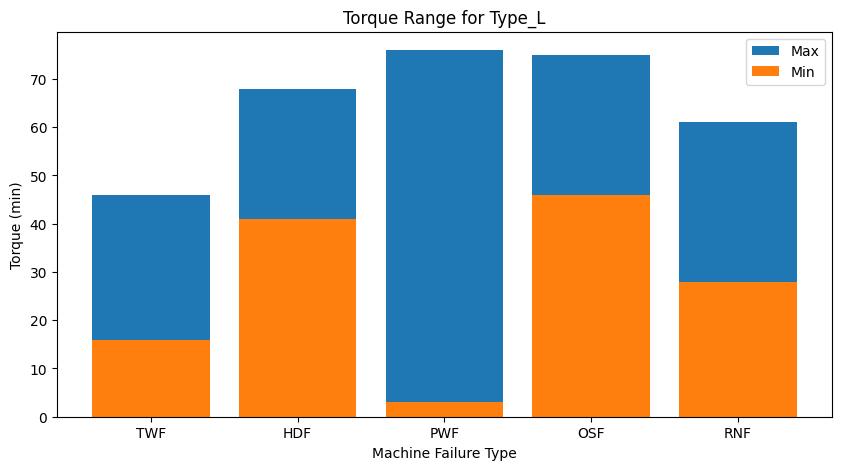

For Type_M:
 - TWF  18min to 62,min.
 - HDF  44min to 68,min.
 - PWF  9min to 76,min.
 - OSF  54min to 74,min.
 - RNF  27min to 46,min.


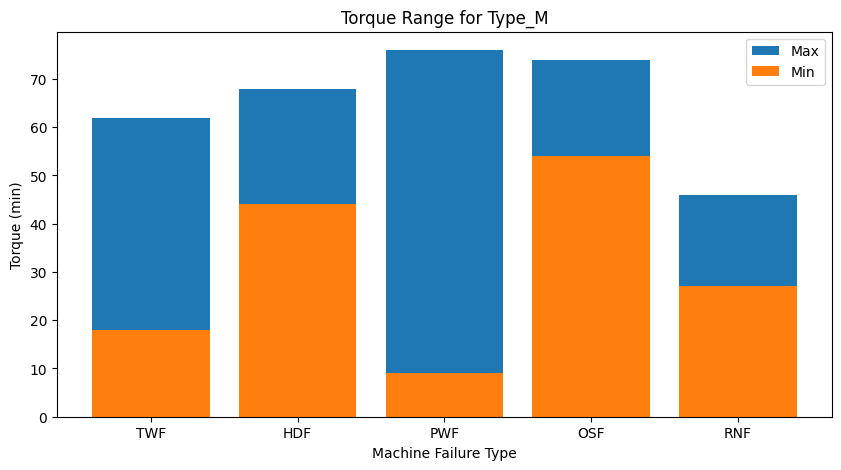

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been created from your data source
machine_failures = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
types = ['Type_H', 'Type_L', 'Type_M']

# For each type, find the range of Tool wear at which each machine component is failing
for t in types:
    print(f"For {t}:")
    df_type = df[df[t] == 1]

    min_values = []
    max_values = []

    for failure in machine_failures:
        df_failure = df_type[df_type[failure] == 1]
        min_min = df_failure['Torque [Nm]'].min()
        max_min = df_failure['Torque [Nm]'].max()
        print(f" - {failure}  {min_min}min to {max_min},min.")

        min_values.append(min_min)
        max_values.append(max_min)

    # Plotting the range of tool wear time for each machine failure type
    plt.figure(figsize=(10,5))
    plt.bar(machine_failures, max_values, label='Max')
    plt.bar(machine_failures, min_values, label='Min')
    plt.xlabel('Machine Failure Type')
    plt.ylabel('Torque (min)')
    plt.title(f'Torque Range for {t}')
    plt.legend()
    plt.show()


For Type_H:
 - TWF  206min to 246,min.
 - HDF  20min to 147,min.
 - PWF  81min to 208,min.
 - OSF  208min to 246,min.
 - RNF  2min to 166,min.


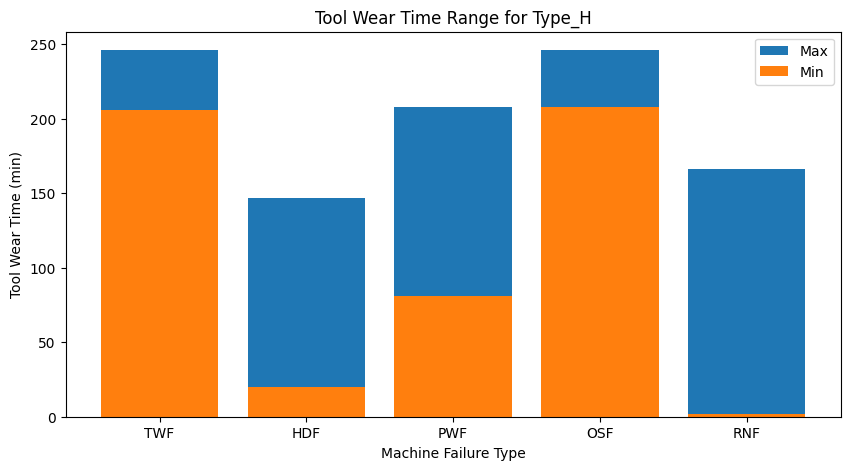

For Type_L:
 - TWF  200min to 235,min.
 - HDF  8min to 229,min.
 - PWF  0min to 215,min.
 - OSF  172min to 251,min.
 - RNF  16min to 215,min.


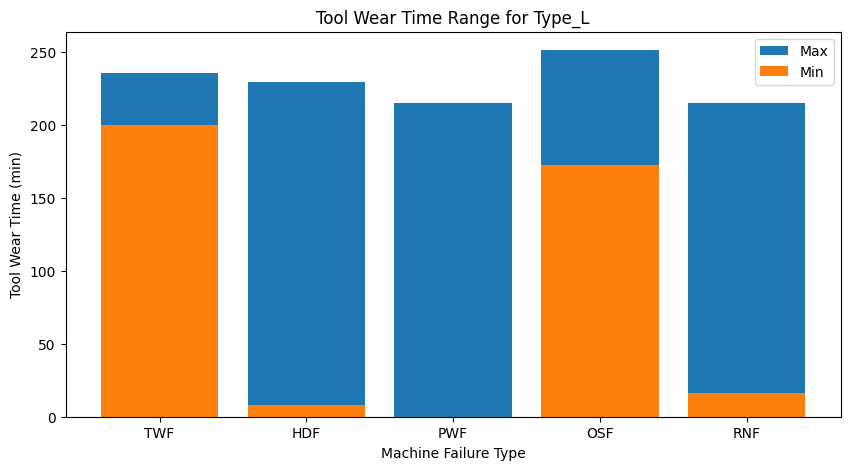

For Type_M:
 - TWF  198min to 253,min.
 - HDF  2min to 213,min.
 - PWF  0min to 234,min.
 - OSF  187min to 253,min.
 - RNF  95min to 132,min.


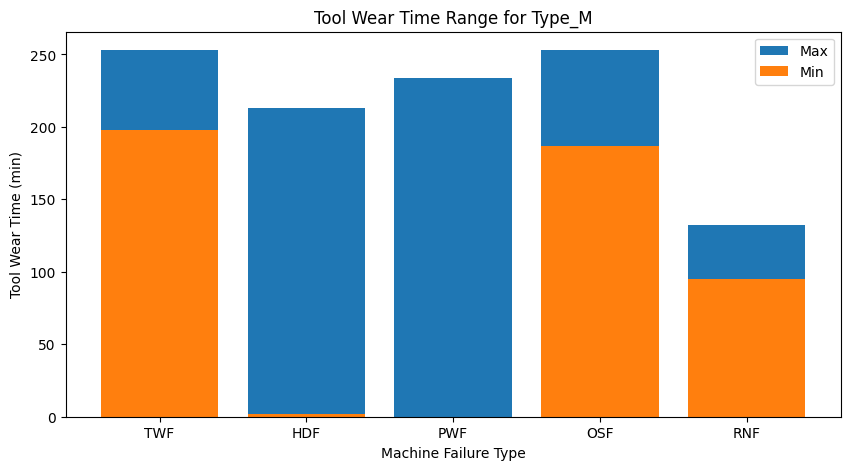

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been created from your data source
machine_failures = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
types = ['Type_H', 'Type_L', 'Type_M']

# For each type, find the range of Tool wear at which each machine component is failing
for t in types:
    print(f"For {t}:")
    df_type = df[df[t] == 1]

    min_values = []
    max_values = []

    for failure in machine_failures:
        df_failure = df_type[df_type[failure] == 1]
        min_min = df_failure['Tool wear [min]'].min()
        max_min = df_failure['Tool wear [min]'].max()
        print(f" - {failure}  {min_min}min to {max_min},min.")

        min_values.append(min_min)
        max_values.append(max_min)

    # Plotting the range of tool wear time for each machine failure type
    plt.figure(figsize=(10,5))
    plt.bar(machine_failures, max_values, label='Max')
    plt.bar(machine_failures, min_values, label='Min')
    plt.xlabel('Machine Failure Type')
    plt.ylabel('Tool Wear Time (min)')
    plt.title(f'Tool Wear Time Range for {t}')
    plt.legend()
    plt.show()


In [35]:
df.head()

,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,M14860,298,308,1551,42,0,0,0,0,0,0,0,0,0,1
1,L47181,298,308,1408,46,3,0,0,0,0,0,0,0,1,0
2,L47182,298,308,1498,49,5,0,0,0,0,0,0,0,1,0
3,L47183,298,308,1433,39,7,0,0,0,0,0,0,0,1,0
4,L47184,298,308,1408,40,9,0,0,0,0,0,0,0,1,0


## MODEL SELECTION AND EVALUTION

- LOGISTIC REGRESSION
- XG BOOST CLASSIFIER
- DECISION TREE
- BINARY CLASSIFICATION
- RANDOM FOREST



### **Split the data into training and test sets**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This line is using the train_test_split function from sklearn.model_selection to split your dataset into training and testing sets.

**Here’s what each parameter is doing:**

- X: This is your input data, which you want to split.
- y: These are your output labels, which you also want to split.
- test_size=0.3: This means that 30% of your data will be used for the test set, and the remaining 70% will be used for the training set.
- random_state=42: This is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices. Providing a particular value (like 42) makes your train and test splits deterministic. If random_state is None or np.random, then a randomly-initialized RandomState object is returned.

**The function returns four outputs:**

- X_train: The subset of your data to use for training your model.
- X_test: The subset of your data to use for testing your model.
- y_train: The corresponding labels for your X_train data.
- y_test: The corresponding labels for your X_test data.

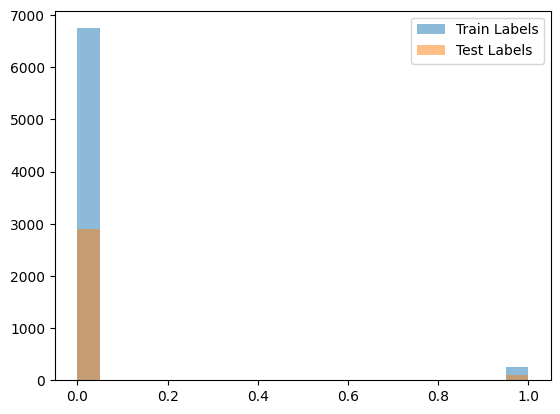

In [42]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and it has been created from your data source
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Create a new column 'Any_Failure' which is 1 if any type of failure has occurred, otherwise 0
df['Any_Failure'] = df[failure_types].max(axis=1)

X = df[features]
y = df['Any_Failure']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.hist(y_train, bins=20, alpha=0.5, label='Train Labels')
plt.hist(y_test, bins=20, alpha=0.5, label='Test Labels')
plt.legend(loc='upper right')
plt.show()

### LOGISTIC REGRESSION


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has been created from your data source
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Create a new column 'Any_Failure' which is 1 if any type of failure has occurred, otherwise 0
df['Any_Failure'] = df[failure_types].max(axis=1)

X = df[features]
y = df['Any_Failure']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Print the accuracy score
print("Accuracy Score: ", accuracy_score(y_test, predictions))

Accuracy Score:  0.972


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.97
Recall: 0.97
F1-score: 0.97


In [45]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[2892   11]
 [  73   24]]


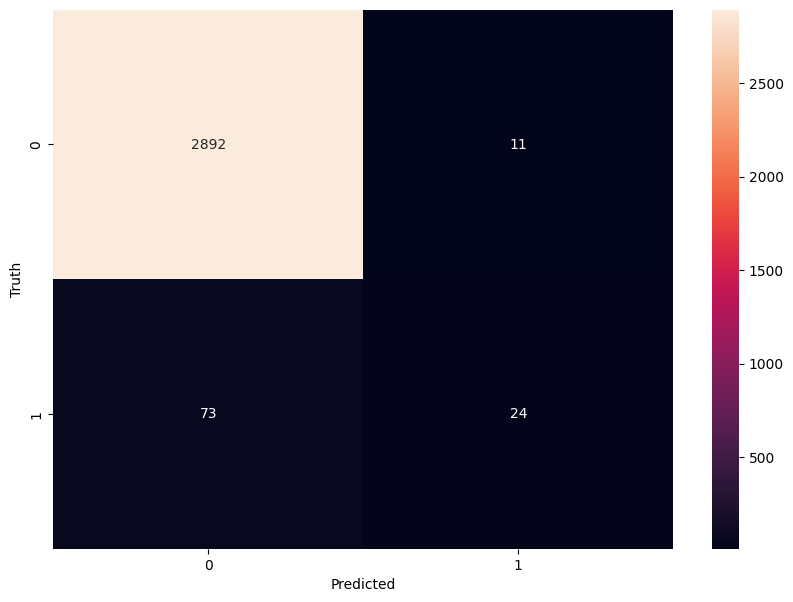

In [46]:
# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [47]:
# Train the model
model.fit(X_train, y_train)

# Take user input for the features
print("Please enter the following details:")
air_temp = float(input("Air temperature [K]: "))
process_temp = float(input("Process temperature [K]: "))
rotational_speed = float(input("Rotational speed [rpm]: "))
torque = float(input("Torque [Nm]: "))
tool_wear = float(input("Tool wear [min]: "))

# Create a DataFrame from the user input
user_input = pd.DataFrame([[air_temp, process_temp, rotational_speed, torque, tool_wear]], columns=features)

# Standardize the user input
user_input = scaler.transform(user_input)

# Use the model to predict whether a failure will occur
prediction = model.predict(user_input)

# Print the prediction
if prediction[0] == 1:
    print("The model predicts that a failure will occur.")
else:
    print("The model predicts that a failure will not occur.")

Please enter the following details:
Air temperature [K]: 406
Process temperature [K]: 33600
Rotational speed [rpm]: 546
Torque [Nm]: 546
Tool wear [min]: 10
The model predicts that a failure will not occur.


In [48]:
print(X_train.shape)
print(y_train.shape)

(7000, 5)
(7000,)


In [49]:
X_train = X_train.reshape(-1, 1)

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'df' is your DataFrame and it has been created from your data source
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

X = df[features]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df[failure_types], test_size=0.3, random_state=42)

# Train a separate model for each type of failure
models = {}
for failure_type in failure_types:
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train[failure_type])
    models[failure_type] = model

# Make predictions on the test set for each model
predictions = pd.DataFrame(index=y_test.index, columns=failure_types)
for failure_type, model in models.items():
    predictions[failure_type] = model.predict(X_test)

# Print the accuracy score and confusion matrix for each model
for failure_type in failure_types:
    print(f"Accuracy Score for {failure_type}: ", accuracy_score(y_test[failure_type], predictions[failure_type]))
    print(f"Confusion Matrix for {failure_type}: \n", confusion_matrix(y_test[failure_type], predictions[failure_type]))


Accuracy Score for TWF:  0.9943333333333333
Confusion Matrix for TWF: 
 [[2981    5]
 [  12    2]]
Accuracy Score for HDF:  0.996
Confusion Matrix for HDF: 
 [[2970    5]
 [   7   18]]
Accuracy Score for PWF:  0.9973333333333333
Confusion Matrix for PWF: 
 [[2967    2]
 [   6   25]]
Accuracy Score for OSF:  0.996
Confusion Matrix for OSF: 
 [[2970    2]
 [  10   18]]
Accuracy Score for RNF:  0.9976666666666667
Confusion Matrix for RNF: 
 [[2993    0]
 [   7    0]]


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for each failure type
for failure_type in failure_types:
    precision = precision_score(y_test[failure_type], predictions[failure_type], average='weighted')
    recall = recall_score(y_test[failure_type], predictions[failure_type], average='weighted')
    f1 = f1_score(y_test[failure_type], predictions[failure_type], average='weighted')

    print(f"Precision ({failure_type}): {precision:.2f}")
    print(f"Recall ({failure_type}): {recall:.2f}")
    print(f"F1-score ({failure_type}): {f1:.2f}\n")


Precision (TWF): 0.99
Recall (TWF): 0.99
F1-score (TWF): 0.99

Precision (HDF): 1.00
Recall (HDF): 1.00
F1-score (HDF): 1.00

Precision (PWF): 1.00
Recall (PWF): 1.00
F1-score (PWF): 1.00

Precision (OSF): 1.00
Recall (OSF): 1.00
F1-score (OSF): 1.00

Precision (RNF): 1.00
Recall (RNF): 1.00
F1-score (RNF): 1.00



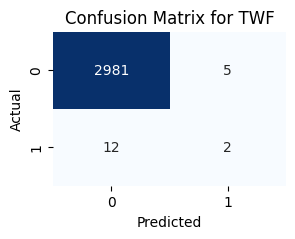

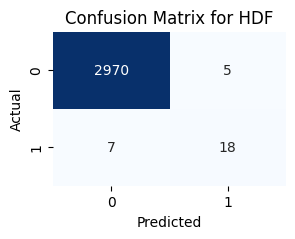

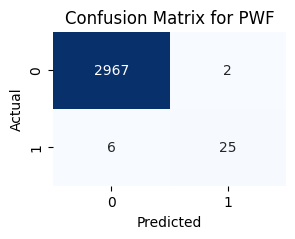

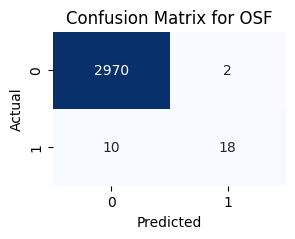

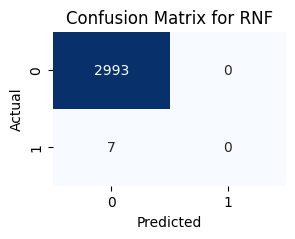

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix for each failure type
for failure_type in failure_types:
    cm = confusion_matrix(y_test[failure_type], predictions[failure_type])
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {failure_type}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [55]:

# Take user input for the features
print("Please enter the following details:")
air_temp = float(input("Air temperature [K]: "))
process_temp = float(input("Process temperature [K]: "))
rotational_speed = float(input("Rotational speed [rpm]: "))
torque = float(input("Torque [Nm]: "))
tool_wear = float(input("Tool wear [min]: "))

# Create a DataFrame from the user input
user_input = pd.DataFrame([[air_temp, process_temp, rotational_speed, torque, tool_wear]], columns=features)

# Standardize the user input
user_input = scaler.transform(user_input)

# Use the models to predict whether each type of failure will occur
predictions = {}
for failure_type, model in models.items():
    predictions[failure_type] = model.predict(user_input)

# Print the predictions
for failure_type, prediction in predictions.items():
    if prediction[0] == 1:
        print(f"The model predicts that a {failure_type} failure will occur.")
    else:
        print(f"The model predicts that a {failure_type} failure will not occur.")


Please enter the following details:
Air temperature [K]: 145
Process temperature [K]: 455
Rotational speed [rpm]: 54
Torque [Nm]: 5
Tool wear [min]: 4
The model predicts that a TWF failure will not occur.
The model predicts that a HDF failure will not occur.
The model predicts that a PWF failure will occur.
The model predicts that a OSF failure will not occur.
The model predicts that a RNF failure will not occur.


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'df' is your DataFrame and it has been created from your data source
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df[failure_types], test_size=0.3, random_state=42)

# Train a separate Decision Tree model for each type of failure
tree_models = {}
for failure_type in failure_types:
    tree_model = DecisionTreeClassifier()
    tree_model.fit(X_train, y_train[failure_type])
    tree_models[failure_type] = tree_model

# Make predictions on the test set for each Decision Tree model
tree_predictions = pd.DataFrame(index=y_test.index, columns=failure_types)
for failure_type, tree_model in tree_models.items():
    tree_predictions[failure_type] = tree_model.predict(X_test)

# Print the accuracy score and confusion matrix for each Decision Tree model
for failure_type in failure_types:
    print(f"Accuracy Score for Decision Tree ({failure_type}): ", accuracy_score(y_test[failure_type], tree_predictions[failure_type]))
    print(f"Confusion Matrix for Decision Tree ({failure_type}): \n", confusion_matrix(y_test[failure_type], tree_predictions[failure_type]))

Accuracy Score for Decision Tree (TWF):  0.9866666666666667
Confusion Matrix for Decision Tree (TWF): 
 [[2959   27]
 [  13    1]]
Accuracy Score for Decision Tree (HDF):  0.9953333333333333
Confusion Matrix for Decision Tree (HDF): 
 [[2968    7]
 [   7   18]]
Accuracy Score for Decision Tree (PWF):  0.9956666666666667
Confusion Matrix for Decision Tree (PWF): 
 [[2964    5]
 [   8   23]]
Accuracy Score for Decision Tree (OSF):  0.9956666666666667
Confusion Matrix for Decision Tree (OSF): 
 [[2969    3]
 [  10   18]]
Accuracy Score for Decision Tree (RNF):  0.995
Confusion Matrix for Decision Tree (RNF): 
 [[2984    9]
 [   6    1]]


In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for each failure type
for failure_type in failure_types:
    precision = precision_score(y_test[failure_type], tree_predictions[failure_type], average='weighted')
    recall = recall_score(y_test[failure_type], tree_predictions[failure_type], average='weighted')
    f1 = f1_score(y_test[failure_type], tree_predictions[failure_type], average='weighted')

    print(f"Precision ({failure_type}): {precision:.2f}")
    print(f"Recall ({failure_type}): {recall:.2f}")
    print(f"F1-score ({failure_type}): {f1:.2f}\n")


Precision (TWF): 0.99
Recall (TWF): 0.99
F1-score (TWF): 0.99

Precision (HDF): 1.00
Recall (HDF): 1.00
F1-score (HDF): 1.00

Precision (PWF): 1.00
Recall (PWF): 1.00
F1-score (PWF): 1.00

Precision (OSF): 1.00
Recall (OSF): 1.00
F1-score (OSF): 1.00

Precision (RNF): 1.00
Recall (RNF): 0.99
F1-score (RNF): 1.00



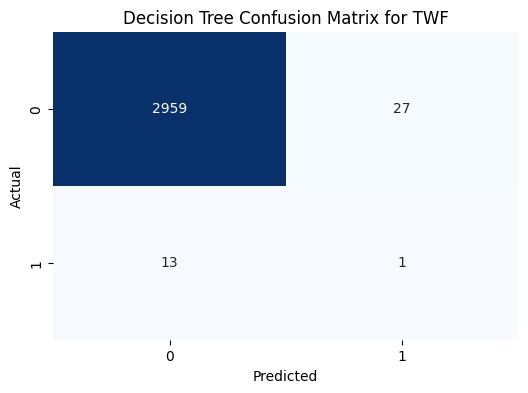

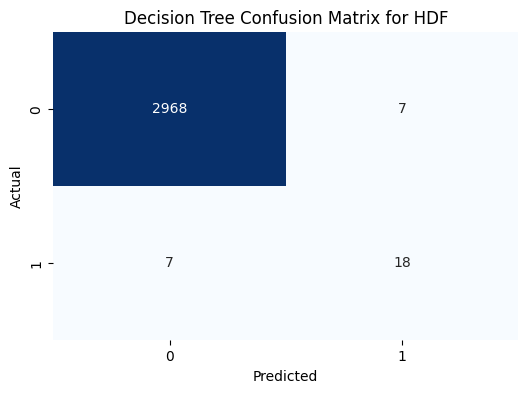

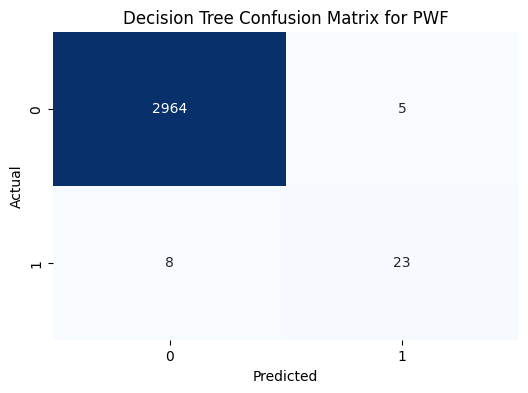

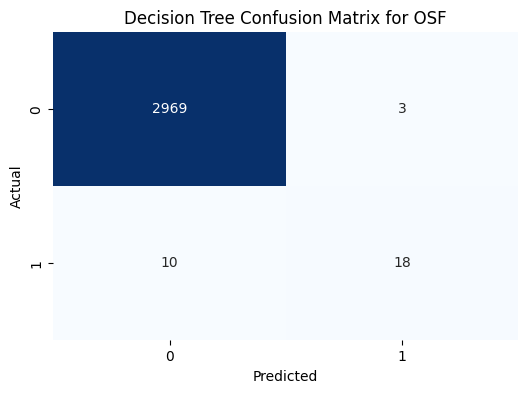

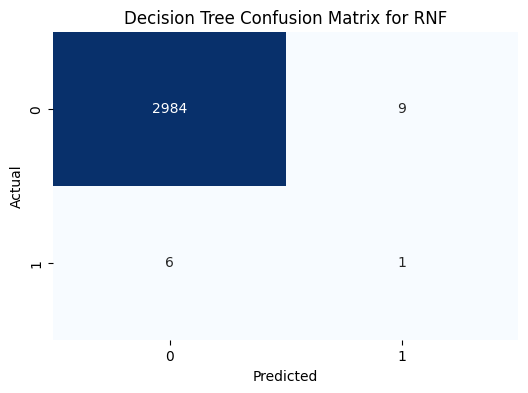

In [58]:
for failure_type in failure_types:
    cm_tree = confusion_matrix(y_test[failure_type], tree_predictions[failure_type])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Decision Tree Confusion Matrix for {failure_type}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and it has been created from your data source
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df[failure_types], test_size=0.3, random_state=42)

# Train a separate Random Forest model for each type of failure
forest_models = {}
for failure_type in failure_types:
    forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    forest_model.fit(X_train, y_train[failure_type])
    forest_models[failure_type] = forest_model

# Make predictions on the test set for each Random Forest model
forest_predictions = pd.DataFrame(index=y_test.index, columns=failure_types)
for failure_type, forest_model in forest_models.items():
    forest_predictions[failure_type] = forest_model.predict(X_test)

# Print the accuracy score and confusion matrix for each Random Forest model
for failure_type in failure_types:
    print(f"Accuracy Score for Random Forest ({failure_type}): ", accuracy_score(y_test[failure_type], forest_predictions[failure_type]))
    print(f"Confusion Matrix for Random Forest ({failure_type}): \n", confusion_matrix(y_test[failure_type], forest_predictions[failure_type]))


Accuracy Score for Random Forest (TWF):  0.995
Confusion Matrix for Random Forest (TWF): 
 [[2985    1]
 [  14    0]]
Accuracy Score for Random Forest (HDF):  0.9956666666666667
Confusion Matrix for Random Forest (HDF): 
 [[2971    4]
 [   9   16]]
Accuracy Score for Random Forest (PWF):  0.995
Confusion Matrix for Random Forest (PWF): 
 [[2966    3]
 [  12   19]]
Accuracy Score for Random Forest (OSF):  0.9956666666666667
Confusion Matrix for Random Forest (OSF): 
 [[2971    1]
 [  12   16]]
Accuracy Score for Random Forest (RNF):  0.9976666666666667
Confusion Matrix for Random Forest (RNF): 
 [[2993    0]
 [   7    0]]


In [60]:
# Calculate precision, recall, and F1-score for each failure type
for failure_type in failure_types:
    precision = precision_score(y_test[failure_type], forest_predictions[failure_type])
    recall = recall_score(y_test[failure_type], forest_predictions[failure_type])
    f1 = f1_score(y_test[failure_type], forest_predictions[failure_type])
    print(f"Precision for {failure_type}: {precision:.2f}")
    print(f"Recall for {failure_type}: {recall:.2f}")
    print(f"F1-score for {failure_type}: {f1:.2f}\n")


Precision for TWF: 0.00
Recall for TWF: 0.00
F1-score for TWF: 0.00

Precision for HDF: 0.80
Recall for HDF: 0.64
F1-score for HDF: 0.71

Precision for PWF: 0.86
Recall for PWF: 0.61
F1-score for PWF: 0.72

Precision for OSF: 0.94
Recall for OSF: 0.57
F1-score for OSF: 0.71

Precision for RNF: 0.00
Recall for RNF: 0.00
F1-score for RNF: 0.00



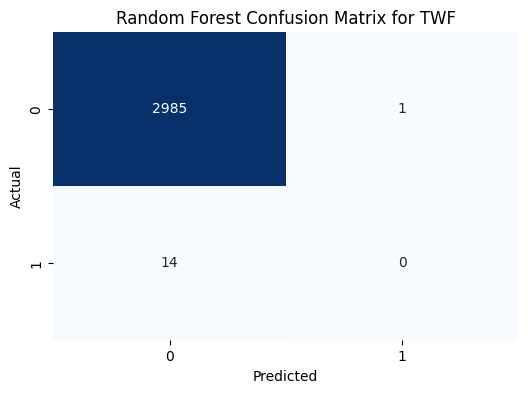

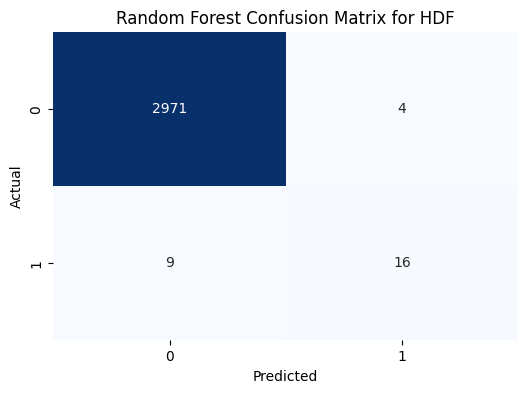

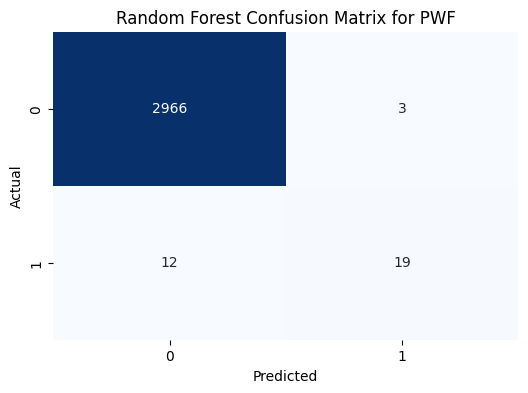

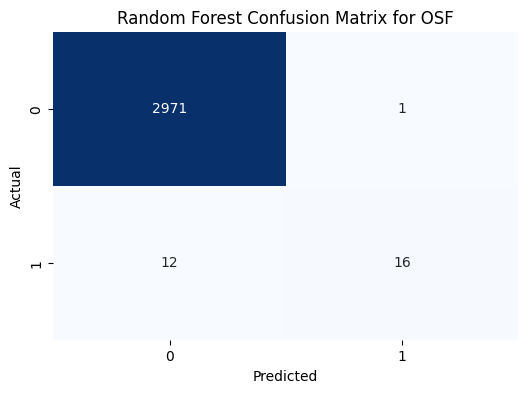

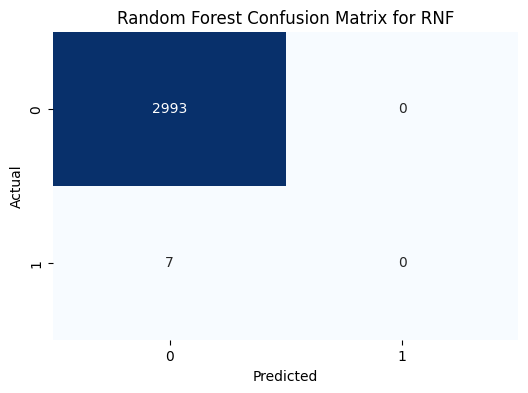

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a confusion matrix for each failure type using Random Forest predictions
for failure_type in failure_types:
    cm_forest = confusion_matrix(y_test[failure_type], forest_predictions[failure_type])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Random Forest Confusion Matrix for {failure_type}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

**HyperTunning Random Forest Model**

In [62]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Assuming 'df' is your DataFrame and it has been created from your data source
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df[failure_types], test_size=0.3, random_state=42)

# Define the Random Forest model
rf_classifier = RandomForestClassifier()

# Define hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,  # Cross-validation folds
    scoring='accuracy',  # Use accuracy as the evaluation metric
    random_state=42,
    n_jobs=-1
)

# Search for the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)
print("Accuracy Score for Best Random Forest Model:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'max_depth': 21, 'max_features': None, 'min_samples_split': 0.3, 'n_estimators': 64}
Accuracy Score for Best Random Forest Model: 0.9713333333333334


In [63]:
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded labels to single-digit labels
y_test_single = y_test.values.argmax(axis=1)
y_pred_single = y_pred.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_single, y_pred_single)
print("Confusion Matrix for Best Random Forest Model:\n", cm)

Confusion Matrix for Best Random Forest Model:
 [[2913    0    4    0    0]
 [  23    0    2    0    0]
 [  10    0   19    0    0]
 [  20    0    2    0    0]
 [   7    0    0    0    0]]


In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.23
Recall: 0.20
F1-score: 0.21


**In this modified code:**

We create a Keras model within the pipeline.
The Random Forest classifier is used as an estimator in the multi-output classifier.
The pipeline combines both the Random Forest and Keras models for multi-label classification.
 Feel free to adjust the Keras model architecture and hyperparameters as needed for your specific use case. 🌲🌳🌟

In [65]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'df' is your DataFrame and it has been created from your data source
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df[failure_types], test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create a Keras model (you can customize this architecture)
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(len(failure_types), activation='sigmoid'))

# Compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create a multi-output classifier with the Random Forest and Keras model
multi_output_classifier = MultiOutputClassifier(estimator=rf_classifier, n_jobs=-1)

# Create a pipeline
pipeline = Pipeline([
    ('classifier', multi_output_classifier)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier(),
                                       n_jobs=-1))])

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate additional metrics
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
conf_matrix = confusion_matrix(y_test.values.ravel(), y_pred.ravel())
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Precision: 0.8448275862068966
Recall: 0.4666666666666667
F1 Score: 0.6012269938650308
Confusion Matrix:
 [[14886     9]
 [   56    49]]


In [70]:
df.head()

,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Any_Failure
0,M14860,298,308,1551,42,0,0,0,0,0,0,0,0,0,1,0
1,L47181,298,308,1408,46,3,0,0,0,0,0,0,0,1,0,0
2,L47182,298,308,1498,49,5,0,0,0,0,0,0,0,1,0,0
3,L47183,298,308,1433,39,7,0,0,0,0,0,0,0,1,0,0
4,L47184,298,308,1408,40,9,0,0,0,0,0,0,0,1,0,0


In [72]:
import pandas as pd

# Assuming 'df' is your main DataFrame
df_copy = df.copy()  # Create a copy of the main DataFrame

# Drop the columns you don't need in the copied DataFrame
columns_to_drop = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_H', 'Type_L', 'Type_M']  # Replace with actual column names
df_copy.drop(columns_to_drop, axis=1, inplace=True)

# Now 'df_copy' contains the new dataset without affecting the original 'df'


In [74]:
df_copy.head()

,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Any_Failure
0,M14860,298,308,1551,42,0,0,0
1,L47181,298,308,1408,46,3,0,0
2,L47182,298,308,1498,49,5,0,0
3,L47183,298,308,1433,39,7,0,0
4,L47184,298,308,1408,40,9,0,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Rotational speed [rpm]'].plot(kind='hist', bins=20, title='Rotational speed [rpm]')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Torque [Nm]'].plot(kind='hist', bins=20, title='Torque [Nm]')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Tool wear [min]'].plot(kind='hist', bins=20, title='Tool wear [min]')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Product ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Rotational speed [rpm]', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Rotational speed [rpm]', y='Torque [Nm]', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Torque [Nm]', y='Tool wear [min]', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rotational speed [rpm]']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rotational speed [rpm]')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Torque [Nm]']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Torque [Nm]')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Air temperature [K]']
  ys = series['Rotational speed [rpm]']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Air temperature [K]', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Air temperature [K]')
_ = plt.ylabel('Rotational speed [rpm]')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Rotational speed [rpm]'].plot(kind='line', figsize=(8, 4), title='Rotational speed [rpm]')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Torque [Nm]'].plot(kind='line', figsize=(8, 4), title='Torque [Nm]')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Tool wear [min]'].plot(kind='line', figsize=(8, 4), title='Tool wear [min]')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Product ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Product ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Product ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Rotational speed [rpm]', y='Product ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Product ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Torque [Nm]', y='Product ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Product ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Tool wear [min]', y='Product ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**LSTM**

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'df' is your DataFrame and it has been created from your data source
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_types = ['Machine failure']
## ['TWF', 'HDF', 'PWF', 'OSF', 'RNF'] -  WAIT KRO
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df_copy[features])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df[failure_types], test_size=0.3, random_state=42)

# Reshape input data for LSTM (assuming time steps = 1)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create an LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(len(failure_types), activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


Epoch 1/10
219/219 [==============================] - 5s 9ms/step - loss: 0.4217 - accuracy: 0.9506 - val_loss: 0.2121 - val_accuracy: 0.9690
Epoch 2/10
219/219 [==============================] - 2s 10ms/step - loss: 0.1826 - accuracy: 0.9649 - val_loss: 0.1493 - val_accuracy: 0.9690
Epoch 3/10
219/219 [==============================] - 1s 6ms/step - loss: 0.1396 - accuracy: 0.9650 - val_loss: 0.1188 - val_accuracy: 0.9697
Epoch 4/10
219/219 [==============================] - 1s 6ms/step - loss: 0.1150 - accuracy: 0.9676 - val_loss: 0.1042 - val_accuracy: 0.9733
Epoch 5/10
219/219 [==============================] - 1s 5ms/step - loss: 0.1051 - accuracy: 0.9681 - val_loss: 0.0976 - val_accuracy: 0.9723
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0999 - accuracy: 0.9680 - val_loss: 0.0927 - val_accuracy: 0.9730
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0960 - accuracy: 0.9687 - val_loss: 0.0903 - val_accuracy: 0.9723
Epoch

**HYPERTUNNING**

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.metrics import Precision, Recall

# Assuming 'df' is your DataFrame and it has been created from your data source
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_types = ['Machine failure']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df[failure_types], test_size=0.3, random_state=42)

# Reshape input data for LSTM (assuming time steps = 1)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create an LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(len(failure_types), activation='sigmoid'))

# Compile the model with custom F1 score metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
loss, accuracy, precision, recall = model.evaluate(X_test_lstm, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")
print(f"Test precision: {precision:.4f}, Test recall: {recall:.4f}")


Epoch 1/50
219/219 [==============================] - 6s 13ms/step - loss: 0.3921 - accuracy: 0.9649 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2028 - val_accuracy: 0.9690 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
219/219 [==============================] - 2s 7ms/step - loss: 0.1764 - accuracy: 0.9649 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1465 - val_accuracy: 0.9690 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
219/219 [==============================] - 1s 6ms/step - loss: 0.1393 - accuracy: 0.9650 - precision: 0.6667 - recall: 0.0081 - val_loss: 0.1201 - val_accuracy: 0.9697 - val_precision: 1.0000 - val_recall: 0.0215
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 0.1168 - accuracy: 0.9680 - precision: 0.9231 - recall: 0.0976 - val_loss: 0.1047 - val_accuracy: 0.9720 - val_precision: 0.6957 - val_recall: 0.1720
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - los